Aprendizado Baseado em Instância!

In [21]:
# Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn import datasets
import pandas as pd
from scipy import stats

In [2]:
irisTemp = pd.read_csv('dados/iris.csv')
irisTemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris = datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [13]:
print('Data:',iris.data[:5])
print('Target:', iris.target[:5])

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target: [0 0 0 0 0]


In [14]:
previsores = iris.data
classes = iris.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classes, test_size=0.3, random_state=0)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
previsoes = knn.predict(X_test)
previsoes[:5]

array([2, 1, 0, 2, 0])

In [19]:
confusion = confusion_matrix(y_test, previsoes)
confusion

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [20]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.9777777777777777

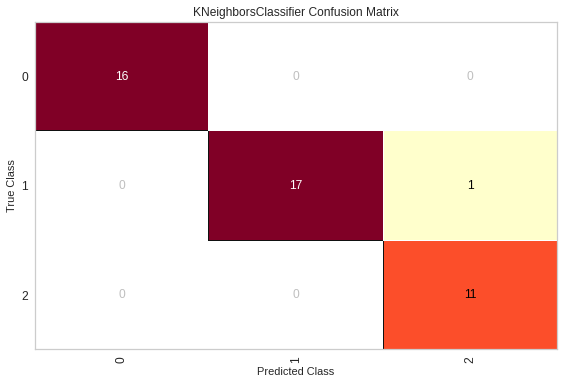

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
# Visualização da Matriz de confusão
v = ConfusionMatrix(knn)
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()